In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Datas/creditcard.csv")

In [5]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


fraud rate : %0.17
normal shopping %99.83


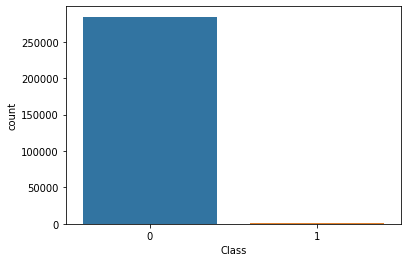

In [6]:
sns.countplot(df.Class)
print("fraud rate : %{:.2f}".format(sum(df.Class)/len(df.Class)*100))
print("normal shopping %{:.2f}".format((len(df.Class)-
sum(df.Class))/len(df.Class)*100))

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [8]:
def creatingamodel(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
random_state=111, stratify = y)
  logreg_model = LogisticRegression()
  logreg_model.fit(X_train, y_train)

  prediction_train = logreg_model.predict(X_train)
  prediction_test = logreg_model.predict(X_test)
  confusion_matrix_train = confusion_matrix(y_train, prediction_train)
  confusion_matrix_test = confusion_matrix(y_test, prediction_test)
  print("accuracy number of model : ", logreg_model.score(X_test, y_test))
  print("Train dataset")
  print(classification_report(y_train, prediction_train))
  print("Test dataset")
  print(classification_report(y_test, prediction_test))
  return None

In [9]:
X = df.drop("Class", axis=1)
y = df["Class"]
creatingamodel(X,y)

accuracy number of model :  0.9989115550718023
Train dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.71      0.65      0.68       394

    accuracy                           1.00    227845
   macro avg       0.85      0.83      0.84    227845
weighted avg       1.00      1.00      1.00    227845

Test dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.69      0.67      0.68        98

    accuracy                           1.00     56962
   macro avg       0.84      0.84      0.84     56962
weighted avg       1.00      1.00      1.00     56962



Bootstraping

In [10]:
from sklearn.utils import resample

normal_shopping = df[df.Class == 0]
fake_shopping = df[df.Class == 1]

fake_shopping_bootstr = resample(fake_shopping,
                                 replace = True,
                                 n_samples = len(normal_shopping),
                                 random_state = 111)
bootstr_df = pd.concat([normal_shopping, fake_shopping_bootstr])
bootstr_df.Class.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [11]:
X = bootstr_df.drop("Class", axis=1)
y = bootstr_df["Class"]
creatingamodel(X, y)

accuracy number of model :  0.9447619717566783
Train dataset
              precision    recall  f1-score   support

           0       0.93      0.97      0.95    227452
           1       0.96      0.92      0.94    227452

    accuracy                           0.95    454904
   macro avg       0.95      0.95      0.95    454904
weighted avg       0.95      0.95      0.95    454904

Test dataset
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     56863
           1       0.96      0.92      0.94     56863

    accuracy                           0.94    113726
   macro avg       0.95      0.94      0.94    113726
weighted avg       0.95      0.94      0.94    113726



In [12]:
normal_shopping = df[df.Class == 0]
fake_shopping = df[df.Class == 1]

fake_shopping_redu = resample(normal_shopping,
                              replace=True,
                              n_samples = len(fake_shopping),
                              random_state = 111)
redu_df = pd.concat([fake_shopping, fake_shopping_redu])
redu_df.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [13]:
X = redu_df.drop("Class", axis = 1)
y = redu_df["Class"]
creatingamodel(X,y)

accuracy number of model :  0.934010152284264
Train dataset
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       393
           1       0.97      0.93      0.95       394

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.96      0.95      0.95       787

Test dataset
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        99
           1       0.98      0.89      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



SMOTE

In [14]:
from imblearn.over_sampling import SMOTE

In [18]:
y = df.Class
X = df.drop("Class", axis=1)

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_smote, y_smote = sm.fit_resample(X,y)
creatingamodel(X_smote, y_smote)

accuracy number of model :  0.9733130506656349
Train dataset
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    227452
           1       0.98      0.96      0.97    227452

    accuracy                           0.97    454904
   macro avg       0.97      0.97      0.97    454904
weighted avg       0.97      0.97      0.97    454904

Test dataset
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56863
           1       0.98      0.96      0.97     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



ADASYN

In [20]:
from imblearn.over_sampling import ADASYN
y = df.Class
X = df.drop("Class",axis=1)

ad = ADASYN()
X_adasyn, y_adasyn = ad.fit_resample(X,y)
creatingamodel(X_adasyn, y_adasyn)

accuracy number of model :  0.9577394194665987
Train dataset
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    227452
           1       0.97      0.95      0.96    227438

    accuracy                           0.96    454890
   macro avg       0.96      0.96      0.96    454890
weighted avg       0.96      0.96      0.96    454890

Test dataset
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     56863
           1       0.97      0.95      0.96     56860

    accuracy                           0.96    113723
   macro avg       0.96      0.96      0.96    113723
weighted avg       0.96      0.96      0.96    113723

